In [513]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [514]:
#reading to dataframe
df=pd.read_csv('train.csv')
df.head(5)

,id,libelle,statut,etat commerc,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires,prix
0,0_train,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé pelliculé,orale,Autorisation active,20140101,20140101,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG),2.83
1,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé à croquer,orale,Autorisation active,20130101,20090101,Procédure de reconnaissance mutuelle,TEVA SANTE,14.30
2,2_train,plaquette(s) thermoformée(s) PVC-aluminium de ...,Présentation active,Déclaration de commercialisation,oui,65%,gélule à libération prolongée,orale,Autorisation active,20000101,19960101,Procédure nationale,MYLAN SAS,5.66
3,3_train,30 sachet(s)-dose(s) papier aluminium complexe...,Présentation active,Déclaration de commercialisation,oui,65%,granulés à libération prolongée,orale,Autorisation active,20050101,20040101,Procédure nationale,SANOFI AVENTIS FRANCE,24.27
4,4_train,plaquette(s) thermoformée(s) PVC-Aluminium de ...,Présentation active,Déclaration d'arrêt de commercialisation,non,100%,comprimé pelliculé,orale,Autorisation active,20150101,20100101,Procédure nationale,TEVA SANTE,59.94


In [515]:
df.tail(5)

,id,libelle,statut,etat commerc,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires,prix
8559,8559_train,plaquette(s) thermoformée(s) polyamide alumini...,Présentation active,Déclaration d'arrêt de commercialisation,non,65%,comprimé orodispersible,orale,Autorisation active,20150101,20080101,Procédure décentralisée,RATIOPHARM (ALLEMAGNE),43.50
8560,8560_train,"12 seringue(s) préremplie(s) en verre de 0,5 ...",Présentation active,Déclaration de commercialisation,oui,65%,solution injectable,sous-cutanée,Autorisation active,19990101,19980101,Procédure centralisée,MERCK SERONO EUROPE (ROYAUME-UNI),781.37
8561,8561_train,flacon(s) polyéthylène haute densité (PEHD) de...,Présentation active,Déclaration d'arrêt de commercialisation,non,65%,comprimé gastro-résistant(e),orale,Autorisation active,20140101,20080101,Procédure nationale,CRISTERS,3.94
8562,8562_train,plaquette(s) thermoformée(s) PVC-Aluminium PVD...,Présentation active,Déclaration de commercialisation,oui,65%,comprimé pelliculé sécable,orale,Autorisation active,20090101,20010101,Procédure nationale,ARROW GENERIQUES,14.21
8563,8563_train,plaquette(s) thermoformée(s) PVC PVDC aluminiu...,Présentation active,Déclaration de commercialisation,oui,65%,gélule,orale,Autorisation active,20070101,20070101,Procédure nationale,ZYDUS FRANCE,4.82


In [516]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8564 entries, 0 to 8563
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8564 non-null   object 
 1   libelle            8564 non-null   object 
 2   statut             8564 non-null   object 
 3   etat commerc       8564 non-null   object 
 4   agrement col       8564 non-null   object 
 5   tx rembours        8564 non-null   object 
 6   forme pharma       8564 non-null   object 
 7   voies admin        8564 non-null   object 
 8   statut admin       8564 non-null   object 
 9   date declar annee  8564 non-null   int64  
 10  date amm annee     8564 non-null   int64  
 11  type proc          8564 non-null   object 
 12  titulaires         8564 non-null   object 
 13  prix               8564 non-null   float64
dtypes: float64(1), int64(2), object(11)
memory usage: 936.8+ KB


((8564, 14), None)

In [517]:
#change datatype
df=df.astype({'agrement col':'category','date declar annee':str,'date amm annee':str})

#df['date declar annee']=df['date declar annee'].map(lambda x: x[:4])
#df['date amm annee']=df['date amm annee'].map(lambda x: x[:4])


In [518]:
#changing datatype to dataframe
from datetime import date
df['date declar annee']=pd.to_datetime(df['date declar annee'],format="%Y%m%d")
df['date amm annee']=pd.to_datetime(df['date amm annee'],format="%Y%m%d")

In [519]:
#changing datatype of 'tx rembours' to int
df['tx rembours']=df['tx rembours'].str.strip('%')
df['tx rembours']=df['tx rembours'].astype(int)

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8564 entries, 0 to 8563
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 8564 non-null   object        
 1   libelle            8564 non-null   object        
 2   statut             8564 non-null   object        
 3   etat commerc       8564 non-null   object        
 4   agrement col       8564 non-null   category      
 5   tx rembours        8564 non-null   int32         
 6   forme pharma       8564 non-null   object        
 7   voies admin        8564 non-null   object        
 8   statut admin       8564 non-null   object        
 9   date declar annee  8564 non-null   datetime64[ns]
 10  date amm annee     8564 non-null   datetime64[ns]
 11  type proc          8564 non-null   object        
 12  titulaires         8564 non-null   object        
 13  prix               8564 non-null   float64       
dtypes: categ

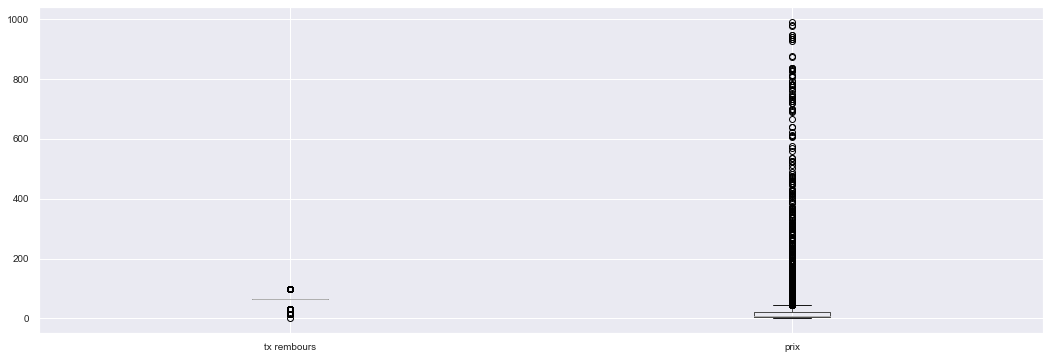

In [521]:
#boxplot to look at the distribution of data
df_num=df[list(df._get_numeric_data().columns)]
#df_n= (df_num-df_num.min(axis=0))/(df_num.max(axis=0)-df_num.min(axis=0,skipna=True)) #normalization
#df_n.boxplot(figsize=(18,6))
df_num.boxplot(figsize=(18,6))

In [522]:
df.describe()

,tx rembours,prix
count,8564.000000,8564.000000
mean,61.402382,28.530284
std,15.640617,81.394061
min,0.000000,0.600000
25%,65.000000,3.940000
50%,65.000000,7.940000
75%,65.000000,20.130000
max,100.000000,990.390000


In [523]:
'''#identify outliers
q25 = df['tx rembours'].quantile(0.25)
q75 = df['tx rembours'].quantile(0.75)
IQR = q75 - q25
   
#Any value higher than ulimit or below llimit is an outlier
ulimit = q75 + 1.5*IQR
llimit = q25 - 1.5*IQR
print(ulimit, llimit, 'are the ulimit and llimit')
print('Imply outliers:')
pd.set_option('display.max_rows', None)
df['tx rembours'][np.bitwise_or(df['tx rembours'] > ulimit, df['tx rembours'] < llimit)]'''

"#identify outliers\nq25 = df['tx rembours'].quantile(0.25)\nq75 = df['tx rembours'].quantile(0.75)\nIQR = q75 - q25\n   \n#Any value higher than ulimit or below llimit is an outlier\nulimit = q75 + 1.5*IQR\nllimit = q25 - 1.5*IQR\nprint(ulimit, llimit, 'are the ulimit and llimit')\nprint('Imply outliers:')\npd.set_option('display.max_rows', None)\ndf['tx rembours'][np.bitwise_or(df['tx rembours'] > ulimit, df['tx rembours'] < llimit)]"

In [524]:
df['tx rembours'].describe()

count    8564.000000
mean       61.402382
std        15.640617
min         0.000000
25%        65.000000
50%        65.000000
75%        65.000000
max       100.000000
Name: tx rembours, dtype: float64

In [525]:
df['tx rembours'].unique()

array([ 65, 100,  15,  30,   0])

In [526]:
#df.set_index("id",inplace=True)

In [527]:
df.head(5)

,id,libelle,statut,etat commerc,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires,prix
0,0_train,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,Présentation active,Déclaration de commercialisation,oui,65,comprimé pelliculé,orale,Autorisation active,2014-01-01,2014-01-01,Procédure décentralisée,MAJORELLE LUXEMBOURG SOPARFI (LUXEMBOURG),2.83
1,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,Présentation active,Déclaration de commercialisation,oui,65,comprimé à croquer,orale,Autorisation active,2013-01-01,2009-01-01,Procédure de reconnaissance mutuelle,TEVA SANTE,14.30
2,2_train,plaquette(s) thermoformée(s) PVC-aluminium de ...,Présentation active,Déclaration de commercialisation,oui,65,gélule à libération prolongée,orale,Autorisation active,2000-01-01,1996-01-01,Procédure nationale,MYLAN SAS,5.66
3,3_train,30 sachet(s)-dose(s) papier aluminium complexe...,Présentation active,Déclaration de commercialisation,oui,65,granulés à libération prolongée,orale,Autorisation active,2005-01-01,2004-01-01,Procédure nationale,SANOFI AVENTIS FRANCE,24.27
4,4_train,plaquette(s) thermoformée(s) PVC-Aluminium de ...,Présentation active,Déclaration d'arrêt de commercialisation,non,100,comprimé pelliculé,orale,Autorisation active,2015-01-01,2010-01-01,Procédure nationale,TEVA SANTE,59.94


# Handling cardinality of categorical variables

In [528]:
pd.value_counts(df[['etat commerc','statut','agrement col']].values.flatten())

Présentation active                                                   8554
Déclaration de commercialisation                                      7262
oui                                                                   7022
non                                                                   1542
Déclaration d'arrêt de commercialisation                              1250
Arrêt de commercialisation (le médicament n'a plus d'autorisation)      51
Présentation abrogée                                                    10
Déclaration de suspension de commercialisation                           1
dtype: int64

In [529]:
df['statut admin'].value_counts()

Autorisation active      8169
Autorisation abrogée      314
Autorisation archivée      75
Autorisation retirée        6
Name: statut admin, dtype: int64

In [530]:
df['type proc'].value_counts()

Procédure nationale                     5610
Procédure décentralisée                 1120
Procédure de reconnaissance mutuelle    1058
Procédure centralisée                    670
Autorisation d'importation parallèle     106
Name: type proc, dtype: int64

In [531]:
df['voies admin'].value_counts().shape
df['voies admin'].value_counts()


orale                                                                                                         6948
cutanée                                                                                                        225
intraveineuse                                                                                                  224
sous-cutanée                                                                                                   177
ophtalmique                                                                                                    162
                                                                                                              ... 
endosinusale,intra-articulaire,intralésionnelle,intramusculaire,intraveineuse,périarticulaire,périoculaire       1
intravitréenne                                                                                                   1
auriculaire,gingivale,nasale,voie buccale autre                                 

In [532]:
df['voies admin'].unique()

array(['orale', 'transdermique', 'inhalée', 'orale,vaginale',
       'ophtalmique', 'sous-cutanée', 'auriculaire',
       'sous-cutanée,voie extracorporelle autre',
       'endosinusale,intra-articulaire,intralésionnelle,intramusculaire,intraveineuse,périarticulaire,périoculaire,voie parentérale autre',
       'intraveineuse,sous-cutanée', 'cutanée', 'rectale',
       'intramusculaire,sous-cutanée', 'intravésicale',
       'intramusculaire,intraveineuse,sous-cutanée', 'intramusculaire',
       'intraveineuse',
       'endosinusale,intra-articulaire,intralésionnelle,intramusculaire,intraveineuse,périarticulaire,périoculaire',
       'intra-artérielle,intraveineuse',
       'endocanalaire,intra-articulaire,intra-artérielle,intra-utérine,intraveineuse',
       'sublinguale', 'nasale',
       'intra-articulaire,intra-artérielle,intra-utérine,intraveineuse',
       'intra-articulaire,intra-artérielle,intra-utérine,intrathécale,intraveineuse,orale,rectale',
       'voie buccale autre', 'ging

In [533]:
'''def freq(x):
    for i in x:
    mostfreq=[i for i, j in zip(x,frequent) if i == j]
    return mostfreq

frequent=df['voies admin'].value_counts()[:10]
df['voies admin']=df['voies admin'].str.split(',').apply(freq)
df['voies admin'].value_counts()'''

"def freq(x):\n    mostfreq=[i for i, j in zip(x,frequent) if i == j]\n    return mostfreq\n\nfrequent=df['voies admin'].value_counts()[:9]\ndf['voies admin']=df['voies admin'].str.split(',').apply(freq)\ndf['voies admin'].value_counts()"

In [534]:
df['voies admin']=df['voies admin'].str.split(',').map(lambda x: x[0])
df['voies admin'].value_counts().shape

(32,)

In [535]:
#taking the first word of the pharma type since that contains the main type
#pd.DataFrame(df['forme pharma'].value_counts())
df['forme pharma']=df['forme pharma'].str.split(' ').map(lambda x: x[0])
df['forme pharma'].value_counts()

comprimé        5420
gélule          1077
solution         859
poudre           399
collyre          143
suspension       120
dispositif        92
gel               81
crème             69
granulés          55
capsule           52
sirop             34
lyophilisat       26
émulsion          23
pommade           22
suppositoire      22
vernis            16
microgranule      14
ovule             13
film              11
implant            3
lotion             3
mousse             2
shampooing         2
emplâtre           2
pilule             1
pansement          1
granules           1
pâte               1
Name: forme pharma, dtype: int64

In [536]:
df['titulaires'].value_counts().shape

(325,)

In [537]:
df.drop(columns=['titulaires'],inplace=True)

In [538]:
df.head()

,id,libelle,statut,etat commerc,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,prix
0,0_train,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,Présentation active,Déclaration de commercialisation,oui,65,comprimé,orale,Autorisation active,2014-01-01,2014-01-01,Procédure décentralisée,2.83
1,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,Présentation active,Déclaration de commercialisation,oui,65,comprimé,orale,Autorisation active,2013-01-01,2009-01-01,Procédure de reconnaissance mutuelle,14.30
2,2_train,plaquette(s) thermoformée(s) PVC-aluminium de ...,Présentation active,Déclaration de commercialisation,oui,65,gélule,orale,Autorisation active,2000-01-01,1996-01-01,Procédure nationale,5.66
3,3_train,30 sachet(s)-dose(s) papier aluminium complexe...,Présentation active,Déclaration de commercialisation,oui,65,granulés,orale,Autorisation active,2005-01-01,2004-01-01,Procédure nationale,24.27
4,4_train,plaquette(s) thermoformée(s) PVC-Aluminium de ...,Présentation active,Déclaration d'arrêt de commercialisation,non,100,comprimé,orale,Autorisation active,2015-01-01,2010-01-01,Procédure nationale,59.94


# Handling null values

In [539]:
df.isna().sum()

id                   0
libelle              0
statut               0
etat commerc         0
agrement col         0
tx rembours          0
forme pharma         0
voies admin          0
statut admin         0
date declar annee    0
date amm annee       0
type proc            0
prix                 0
dtype: int64

In [540]:
libelle=pd.read_csv("libelle_fe.csv")
libelle.head()

,libelle,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,libelle_comprime,...,nb_stylo,nb_seringue,nb_pilulier,nb_sachet,nb_comprime,nb_gelule,nb_film,nb_poche,nb_capsule,nb_ml
0,12 sachet(s) papier aluminium polyéthylène de ...,0,0,0,0,0,0,0,1,0,...,0,0,0,12,0,0,0,0,0,0.0
1,plaquette(s) thermoformée(s) (ACLAR RX) polytr...,1,0,0,0,0,0,0,0,1,...,0,0,0,0,28,0,0,0,0,0.0
2,tube(s) polypropylène dioxyde de titane de 30 ...,0,0,0,1,0,0,0,0,1,...,0,0,0,0,30,0,0,0,0,0.0
3,plaquette(s) thermoformée(s) polyamide alumini...,1,0,0,0,0,0,0,0,1,...,0,0,0,0,20,0,0,0,0,0.0
4,1 flacon(s) pressurisé(e)(s) aluminium de 120 ...,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [541]:
#handling duplicate values
libelle[libelle.duplicated(keep=False)]

,libelle,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,libelle_pilulier,libelle_sachet,libelle_comprime,...,nb_stylo,nb_seringue,nb_pilulier,nb_sachet,nb_comprime,nb_gelule,nb_film,nb_poche,nb_capsule,nb_ml
317,plaquette(s) thermoformée(s) aluminium polyami...,1,0,0,0,0,0,0,0,1,...,0,0,0,0,7,0,0,0,0,0.0
528,1 cartouche(s) polystyrène polypropylène) de 2...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
731,aquette(s) thermoformée(s) PVC-aluminium de 11...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,11,0,0,0,0,0.0
1134,"1 stylo prérempli en verre (SureClick) de 0,5 ml",0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0.5
1146,1 flacon(s) en verre avec seringue pour admini...,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1350,plaquette(s) thermoformée(s) PVC aluminium PVD...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,14,0,0,0,0.0
1388,plaquette(s) thermoformée(s) aluminium PVC de ...,1,0,0,0,0,0,0,0,1,...,0,0,0,0,4,0,0,0,0,0.0
2115,6 récipient(s) unidose(s) polyéthylène basse d...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2153,plaquette(s) (ACLAR RX) polytrifluorochloroéth...,1,0,0,0,0,0,0,0,1,...,0,0,0,0,6,0,0,0,0,0.0
2277,"1 seringue(s) préremplie(s) en verre de 0,5 ml...",0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.5


In [542]:
# dropping ALL duplicte rows keeping first occurence
libelle.drop_duplicates( keep = 'first', inplace = True) 

In [543]:
#joining the libelle and df dataframes
df=pd.merge(df, libelle, on='libelle',how='left',left_index=True)

In [544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 8564 entries, 2065.0 to 2112.0
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 8564 non-null   object        
 1   libelle            8564 non-null   object        
 2   statut             8564 non-null   object        
 3   etat commerc       8564 non-null   object        
 4   agrement col       8564 non-null   category      
 5   tx rembours        8564 non-null   int32         
 6   forme pharma       8564 non-null   object        
 7   voies admin        8564 non-null   object        
 8   statut admin       8564 non-null   object        
 9   date declar annee  8564 non-null   datetime64[ns]
 10  date amm annee     8564 non-null   datetime64[ns]
 11  type proc          8564 non-null   object        
 12  prix               8564 non-null   float64       
 13  libelle_plaquette  8052 non-null   float64       
 14 

In [545]:
df.head()

,id,libelle,statut,etat commerc,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,...,nb_stylo,nb_seringue,nb_pilulier,nb_sachet,nb_comprime,nb_gelule,nb_film,nb_poche,nb_capsule,nb_ml
2065.0,0_train,3 plaquette(s) thermoformée(s) PVC-Aluminium d...,Présentation active,Déclaration de commercialisation,oui,65,comprimé,orale,Autorisation active,2014-01-01,...,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0
2363.0,1_train,plaquette(s) thermoformée(s) aluminium de 28 c...,Présentation active,Déclaration de commercialisation,oui,65,comprimé,orale,Autorisation active,2013-01-01,...,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0
NaN,2_train,plaquette(s) thermoformée(s) PVC-aluminium de ...,Présentation active,Déclaration de commercialisation,oui,65,gélule,orale,Autorisation active,2000-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2933.0,3_train,30 sachet(s)-dose(s) papier aluminium complexe...,Présentation active,Déclaration de commercialisation,oui,65,granulés,orale,Autorisation active,2005-01-01,...,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0
2385.0,4_train,plaquette(s) thermoformée(s) PVC-Aluminium de ...,Présentation active,Déclaration d'arrêt de commercialisation,non,100,comprimé,orale,Autorisation active,2015-01-01,...,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0


In [546]:
df.isna().sum()

id                     0
libelle                0
statut                 0
etat commerc           0
agrement col           0
tx rembours            0
forme pharma           0
voies admin            0
statut admin           0
date declar annee      0
date amm annee         0
type proc              0
prix                   0
libelle_plaquette    512
libelle_ampoule      512
libelle_flacon       512
libelle_tube         512
libelle_stylo        512
libelle_seringue     512
libelle_pilulier     512
libelle_sachet       512
libelle_comprime     512
libelle_gelule       512
libelle_film         512
libelle_poche        512
libelle_capsule      512
nb_plaquette         512
nb_ampoule           512
nb_flacon            512
nb_tube              512
nb_stylo             512
nb_seringue          512
nb_pilulier          512
nb_sachet            512
nb_comprime          512
nb_gelule            512
nb_film              512
nb_poche             512
nb_capsule           512
nb_ml                512


In [547]:
df=df.replace(np.nan,0)

In [548]:
df.isna().sum()

id                   0
libelle              0
statut               0
etat commerc         0
agrement col         0
tx rembours          0
forme pharma         0
voies admin          0
statut admin         0
date declar annee    0
date amm annee       0
type proc            0
prix                 0
libelle_plaquette    0
libelle_ampoule      0
libelle_flacon       0
libelle_tube         0
libelle_stylo        0
libelle_seringue     0
libelle_pilulier     0
libelle_sachet       0
libelle_comprime     0
libelle_gelule       0
libelle_film         0
libelle_poche        0
libelle_capsule      0
nb_plaquette         0
nb_ampoule           0
nb_flacon            0
nb_tube              0
nb_stylo             0
nb_seringue          0
nb_pilulier          0
nb_sachet            0
nb_comprime          0
nb_gelule            0
nb_film              0
nb_poche             0
nb_capsule           0
nb_ml                0
dtype: int64

In [549]:
df.drop(columns=['libelle'],inplace=True)

In [550]:
df.index

Float64Index([2065.0, 2363.0,    nan, 2933.0, 2385.0, 1958.0,    nan,  132.0,
              2052.0, 2339.0,
              ...
               998.0,   86.0,    nan,  776.0, 2305.0, 1566.0,  600.0,   54.0,
              2446.0, 2112.0],
             dtype='float64', length=8564)

In [551]:
#setting 'id' as index
df.set_index("id",inplace=True)
df.head()

,statut,etat commerc,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,...,nb_stylo,nb_seringue,nb_pilulier,nb_sachet,nb_comprime,nb_gelule,nb_film,nb_poche,nb_capsule,nb_ml
id,,,,,,,,,,,,,,,,,,,,,
0_train,Présentation active,Déclaration de commercialisation,oui,65,comprimé,orale,Autorisation active,2014-01-01,2014-01-01,Procédure décentralisée,...,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0
1_train,Présentation active,Déclaration de commercialisation,oui,65,comprimé,orale,Autorisation active,2013-01-01,2009-01-01,Procédure de reconnaissance mutuelle,...,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0
2_train,Présentation active,Déclaration de commercialisation,oui,65,gélule,orale,Autorisation active,2000-01-01,1996-01-01,Procédure nationale,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3_train,Présentation active,Déclaration de commercialisation,oui,65,granulés,orale,Autorisation active,2005-01-01,2004-01-01,Procédure nationale,...,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0
4_train,Présentation active,Déclaration d'arrêt de commercialisation,non,100,comprimé,orale,Autorisation active,2015-01-01,2010-01-01,Procédure nationale,...,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0


In [552]:
df.shape

(8564, 38)

# EDA

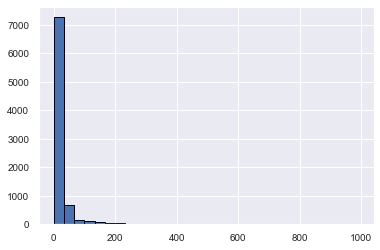

In [553]:
#EDA
df['prix'].hist(edgecolor='black',bins=30)

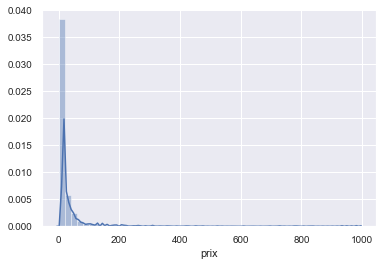

In [554]:
#the distribution prix is right skewed
sns.distplot(df['prix'])

In [555]:
#skewness and kurtosis
print("Skewness: {:0.3f}".format(df['prix'].skew()))
print("Kurtosis: {:0.3f}".format(df['prix'].kurt()))

Skewness: 7.128
Kurtosis: 60.316


In [582]:
df[['tx rembours','prix']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8564 entries, 0_train to 8563_train
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tx rembours  8564 non-null   int32  
 1   prix         8564 non-null   float64
dtypes: float64(1), int32(1)
memory usage: 487.3+ KB


In [1]:
#import scipy.stats as stats
#sns.jointplot(x='tx rembours', y='prix', data=df, kind='reg',joint_kws={"s": 10}).annotate(stats.pearsonr)

['date declar annee', 'statut admin', 'type proc', 'voies admin', 'forme pharma', 'agrement col', 'etat commerc', 'date amm annee', 'statut']


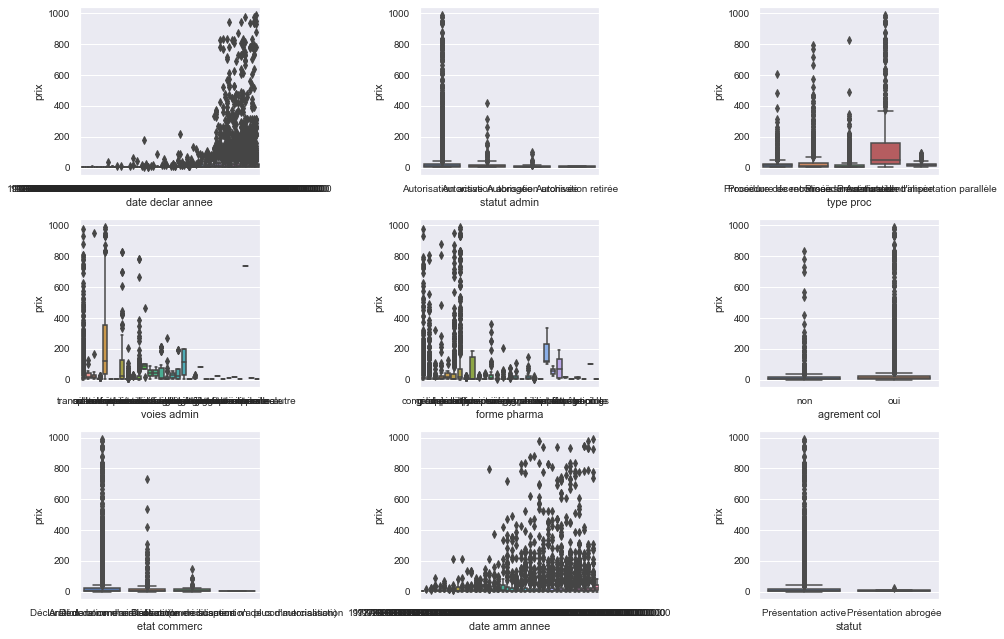

In [556]:
num_columns=df._get_numeric_data().columns
#categorical columns alone
cat_columns=list(set(df.columns) - set(num_columns))
print(cat_columns)
fig, ax = plt.subplots(3,3, figsize=(14,9))
for var, subplot in zip(cat_columns, ax.flatten()):
    sns.boxplot(x=var, y='prix', data=df, ax=subplot)
fig.tight_layout()

In [557]:
#one hot encoding the categorical variables
df=pd.get_dummies(df,columns=['statut admin','type proc','voies admin','forme pharma','agrement col','etat commerc','statut'],prefix=None,drop_first=True)  

In [558]:
df=df.astype({'date declar annee':str,'date amm annee':str})

df['date declar annee']=df['date declar annee'].map(lambda x: x[:4])
df['date amm annee']=df['date amm annee'].map(lambda x: x[:4])
df=df.astype({'date declar annee':int,'date amm annee':int})

In [559]:
#correlation
df[list(df._get_numeric_data().columns)].corr()

,tx rembours,date declar annee,date amm annee,prix,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,...,forme pharma_solution,forme pharma_suppositoire,forme pharma_suspension,forme pharma_vernis,forme pharma_émulsion,agrement col_oui,etat commerc_Déclaration d'arrêt de commercialisation,etat commerc_Déclaration de commercialisation,etat commerc_Déclaration de suspension de commercialisation,statut_Présentation active
tx rembours,1.000000,0.092899,0.087774,0.232052,0.051461,0.004992,-0.007327,-0.177455,0.048372,0.100245,...,0.009080,-0.049537,-0.024346,-0.086868,-0.043604,0.013747,0.000783,-0.000293,0.002486,-0.007865
date declar annee,0.092899,1.000000,0.646342,0.049053,0.244060,-0.194272,-0.152689,-0.100165,0.008139,-0.032571,...,-0.213689,-0.105741,-0.073991,0.018745,-0.015325,-0.227636,0.279450,-0.287546,0.004617,-0.000813
date amm annee,0.087774,0.646342,1.000000,0.064911,0.279004,-0.161081,-0.168884,-0.123971,0.011898,-0.067550,...,-0.214430,-0.078786,-0.073988,0.027213,-0.008793,-0.061138,0.071062,-0.078703,-0.003319,0.016745
prix,0.232052,0.049053,0.064911,1.000000,-0.164683,-0.007391,0.058721,-0.039306,0.210010,0.287554,...,0.210512,-0.013645,0.001737,-0.008508,0.023277,0.056625,-0.064150,0.064981,-0.003047,0.008979
libelle_plaquette,0.051461,0.244060,0.279004,-0.164683,1.000000,-0.208005,-0.551339,-0.222789,-0.109566,-0.310510,...,-0.471830,0.001586,-0.168752,-0.061244,-0.073459,-0.049229,0.080097,-0.079667,-0.015298,0.026634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
agrement col_oui,0.013747,-0.227636,-0.061138,0.056625,-0.049229,-0.015656,0.018964,0.002516,-0.019027,0.043850,...,0.053281,0.023782,0.027423,0.006199,0.024318,1.000000,-0.810756,0.829096,-0.023061,0.072963
etat commerc_Déclaration d'arrêt de commercialisation,0.000783,0.279450,0.071062,-0.064150,0.080097,-0.010160,-0.039747,-0.006920,-0.010505,-0.050080,...,-0.075281,-0.020980,-0.023959,0.012749,-0.021453,-0.810756,1.000000,-0.976338,-0.004467,-0.024602
etat commerc_Déclaration de commercialisation,-0.000293,-0.287546,-0.078703,0.064981,-0.079667,0.007954,0.039901,0.009467,0.011639,0.048323,...,0.075342,0.021489,0.022809,-0.011805,0.021973,0.829096,-0.976338,1.000000,-0.025522,0.023613
etat commerc_Déclaration de suspension de commercialisation,0.002486,0.004617,-0.003319,-0.003047,-0.015298,-0.001588,-0.004209,-0.001701,-0.000836,0.049079,...,-0.003608,-0.000548,0.090651,-0.000468,-0.000561,-0.023061,-0.004467,-0.025522,1.000000,0.000369


In [560]:
#seeing correlation with the target value in descending order
df[list(df._get_numeric_data().columns)].corr()['prix'].sort_values(ascending=False)

prix                               1.000000
type proc_Procédure centralisée    0.427640
voies admin_sous-cutanée           0.406470
nb_seringue                        0.369943
libelle_seringue                   0.287554
                                     ...   
libelle_comprime                  -0.123806
forme pharma_comprimé             -0.136113
libelle_plaquette                 -0.164683
voies admin_orale                 -0.203734
type proc_Procédure nationale     -0.260116
Name: prix, Length: 102, dtype: float64

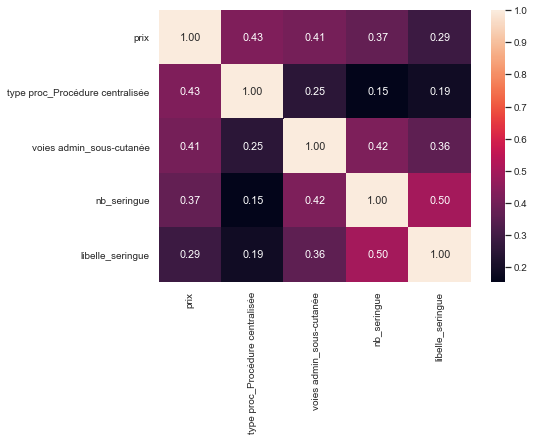

In [561]:
#comparing the correlation of first four highly correlated features
mostlycorrelated=df[list(df._get_numeric_data().columns)].corr()['prix'].sort_values(ascending=False)[1:5]
mostlycorrelated=list(mostlycorrelated.index)
#Heatmap correlation
fig, ax = plt.subplots(figsize=(7,5))
correlations=df[['prix']+mostlycorrelated].corr()
sns.set(font_scale=0.9)
sns.heatmap(correlations, ax = ax,annot=True,fmt='.2f');

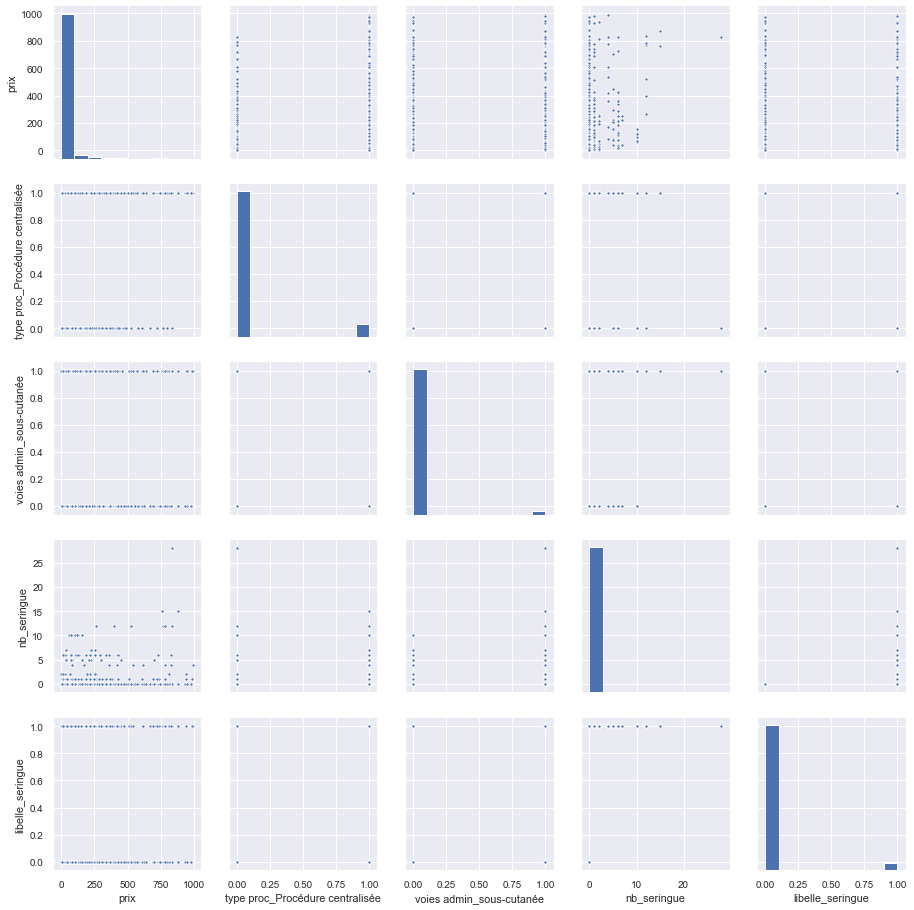

In [562]:
#pairplot
pair=['prix']+mostlycorrelated
sns.pairplot(df[pair],plot_kws={"s": 10})

Text(0, 0.5, 'explained_variance_ratio')

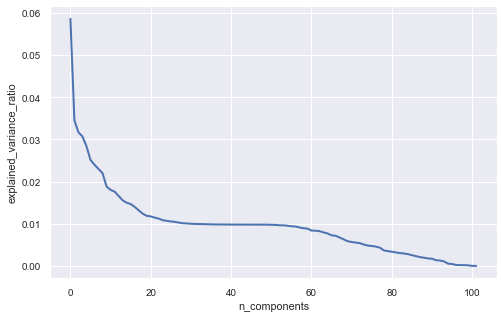

In [563]:
#pca
#standardization
from sklearn.preprocessing import StandardScaler
scaled_data=StandardScaler().fit_transform(df)

from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(scaled_data)

plt.figure(1, figsize=(8, 5))
plt.clf()
#plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
#plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio')
#almost 20 principal components explain most of the variance in data

Text(0, 0.5, 'PCA2')

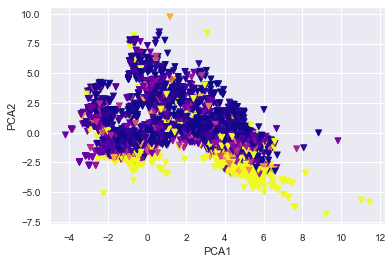

In [564]:
x_pca=pca.transform(scaled_data)
plt.scatter(x_pca[:,0],x_pca[:,1],marker='v',c=y,cmap='plasma')
plt.xlabel("PCA1")
plt.ylabel('PCA2')

In [567]:
df.columns, df.shape

(Index(['tx rembours', 'date declar annee', 'date amm annee', 'prix',
        'libelle_plaquette', 'libelle_ampoule', 'libelle_flacon',
        'libelle_tube', 'libelle_stylo', 'libelle_seringue',
        ...
        'forme pharma_solution', 'forme pharma_suppositoire',
        'forme pharma_suspension', 'forme pharma_vernis',
        'forme pharma_émulsion', 'agrement col_oui',
        'etat commerc_Déclaration d'arrêt de commercialisation',
        'etat commerc_Déclaration de commercialisation',
        'etat commerc_Déclaration de suspension de commercialisation',
        'statut_Présentation active'],
       dtype='object', length=102),
 (8564, 102))

In [566]:
df.head()

,tx rembours,date declar annee,date amm annee,prix,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,...,forme pharma_solution,forme pharma_suppositoire,forme pharma_suspension,forme pharma_vernis,forme pharma_émulsion,agrement col_oui,etat commerc_Déclaration d'arrêt de commercialisation,etat commerc_Déclaration de commercialisation,etat commerc_Déclaration de suspension de commercialisation,statut_Présentation active
id,,,,,,,,,,,,,,,,,,,,,
0_train,65,2014,2014,2.83,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
1_train,65,2013,2009,14.30,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
2_train,65,2000,1996,5.66,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
3_train,65,2005,2004,24.27,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,1
4_train,100,2015,2010,59.94,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1


In [568]:
#Selecting features and target variable
y=df.loc[:,'prix'].values          
X=df.loc[:,df.columns!='prix'].values

In [569]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123,stratify=None)

In [570]:
X_train.shape, X_test.shape

((6423, 101), (2141, 101))

In [571]:
#standardization 
from sklearn.preprocessing import StandardScaler

sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [572]:
df.describe()

,tx rembours,date declar annee,date amm annee,prix,libelle_plaquette,libelle_ampoule,libelle_flacon,libelle_tube,libelle_stylo,libelle_seringue,...,forme pharma_solution,forme pharma_suppositoire,forme pharma_suspension,forme pharma_vernis,forme pharma_émulsion,agrement col_oui,etat commerc_Déclaration d'arrêt de commercialisation,etat commerc_Déclaration de commercialisation,etat commerc_Déclaration de suspension de commercialisation,statut_Présentation active
count,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,...,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000,8564.000000
mean,61.402382,2006.552429,2003.521952,28.530284,0.667095,0.021135,0.131714,0.024171,0.005955,0.046240,...,0.100304,0.002569,0.014012,0.001868,0.002686,0.819944,0.145960,0.847968,0.000117,0.998832
std,15.640617,10.409941,8.212770,81.394061,0.471280,0.143843,0.338199,0.153589,0.076944,0.210017,...,0.300422,0.050622,0.117548,0.043186,0.051757,0.384257,0.353087,0.359073,0.010806,0.034153
min,0.000000,1910.000000,1973.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,2005.000000,1998.000000,3.940000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,65.000000,2010.000000,2006.000000,7.940000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,65.000000,2013.000000,2010.000000,20.130000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,100.000000,2016.000000,2015.000000,990.390000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# SVR

In [573]:
# SVR
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,mean_squared_error
svr_reg = SVR(C=1.0,kernel = 'rbf',gamma='scale')
svr_reg.fit(X_train, y_train)
y_pred=svr_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: %f" % (rmse))
print(f'MAE:{mean_absolute_error(y_test,y_pred)}')

RMSE: 85.478316
MAE:21.70769511662298


# RandomForest

In [574]:
#randomforestregressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: %f" % (rmse))
print(f'MAE:{mean_absolute_error(y_test,y_pred)}')

RMSE: 55.631172
MAE:15.489461405857542


In [579]:
#Feature selection using randomforest
#cross validation using randomforest classifier to find the optimal features
from sklearn.feature_selection import RFECV

#The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_cv= RandomForestRegressor() 
rfecv = RFECV(estimator=clf_rf_cv, step=1, cv=5,scoring='neg_root_mean_squared_error')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', xtrain.columns[rfecv.support_])

Optimal number of features : 94


NameError: name 'xtrain' is not defined

In [ ]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
#selecting important features
X_imp=df.loc[:,df.columns!='prix'].values
#train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_imp,y,test_size=0.25,random_state=123,stratify=None)

In [575]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03],
              'subsample'    : [0.9, 0.5, 0.2],
              'n_estimators' : [100,500,1000],
              'max_depth'    : [4,6,8] }

grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_estimator_)

KeyboardInterrupt: 

In [ ]:
print(f'The best score is {grid.best_score_} with the hyperparamters {grid.best_params_}')
y_pred=grid.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: %f" % (rmse))
print(f'MAE:{mean_absolute_error(y_test,y_pred)}')

# XGBoost

In [370]:
#XGboost regressor
import xgboost as xgb 
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test = xgb.DMatrix(data=X_test,label=y_test)

params = {"booster":"gblinear","objective":"reg:squarederror","subsample":[0.3,0.6,0.9]}

xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=10)
y_pred = xg_reg.predict(DM_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: %f" % (rmse))
print(f'MAE:{mean_absolute_error(y_test,y_pred)}')

RMSE: 18.960889
MAE:12.030722046872512


In [371]:
from sklearn.model_selection import RandomizedSearchCV

gbm_param_grid = {'learning_rate': np.arange(0.3,0.5,.05),'n_estimators': [200],'subsample': np.arange(0.9,1.05,.05)}

gbm = xgb.XGBRegressor(objective="reg:squarederror")
randomized_mse = RandomizedSearchCV(estimator=gbm, param_distributions=gbm_param_grid, n_iter=5, scoring='neg_root_mean_squared_error', cv=4, verbose=1)
randomized_mse.fit(X_train, y_train)

print("Best parameters found: ",randomized_mse.best_params_)
print("Lowest RMSE found: ",np.abs(randomized_mse.best_score_))

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 11.7min finished


Best parameters found:  {'subsample': 0.9500000000000001, 'n_estimators': 200, 'learning_rate': 0.3}
Lowest RMSE found:  16.58839804887878


In [400]:
test_data=pd.read_csv("test.csv")
test_data.head()

,id,libelle,statut,etat commerc,agrement col,tx rembours,forme pharma,voies admin,statut admin,date declar annee,date amm annee,type proc,titulaires
0,0_test,plaquette(s) thermoformée(s) polyamide alumini...,Présentation active,Déclaration d'arrêt de commercialisation,non,65%,comprimé gastro-résistant(e),orale,Autorisation active,20130101,20080101,Procédure de reconnaissance mutuelle,TEVA SANTE
1,1_test,plaquette(s) thermoformée(s) PVC PVDC aluminiu...,Présentation active,Déclaration de commercialisation,non,30%,capsule,vaginale,Autorisation active,20120101,19970101,Procédure nationale,INNOTECH INTERNATIONAL
2,2_test,plaquette(s) thermoformée(s) PVC-Aluminium de ...,Présentation active,Déclaration d'arrêt de commercialisation,non,65%,comprimé,orale,Autorisation abrogée,20130101,20060101,Procédure nationale,ACTAVIS FRANCE
3,3_test,5 cartouche(s) en verre de 3 ml dans stylo pré...,Présentation active,Déclaration d'arrêt de commercialisation,non,65%,suspension injectable,sous-cutanée,Autorisation active,20120101,20000101,Procédure centralisée,SANOFI AVENTIS (ALLEMAGNE)
4,4_test,5 poche(s) à 3 compartiments polyamide polypro...,Présentation active,Déclaration de commercialisation,oui,65%,émulsion pour perfusion,intraveineuse,Autorisation active,20110101,20110101,Procédure décentralisée,B BRAUN MELSUNGEN


In [401]:
def preprocess(df):
    #changing datatype of 'tx rembours' to int
    df=df.astype({'tx rembours':'str'})
    df['tx rembours']=df['tx rembours'].str.strip('%')
    df['tx rembours']=df['tx rembours'].astype(int)
    #handling categorical
    df['voies admin']=df['voies admin'].str.split(',').map(lambda x: x[0])
    df['forme pharma']=df['forme pharma'].str.split(' ').map(lambda x: x[0])
    df.drop(columns=['titulaires'],inplace=True)
    return df

In [402]:
def merge(df):
    libelle=pd.read_csv("libelle_fe.csv")
    # dropping ALL duplicte rows keeping first occurence
    libelle.drop_duplicates( keep = 'first', inplace = True) 
    #joining the libelle and df dataframes
    df=pd.merge(df, libelle, on='libelle',how='left',left_index=True)
    df=df.replace(np.nan,0)
    df.drop(columns=['libelle'],inplace=True)
    df.set_index("id",inplace=True)
    df=pd.get_dummies(df,columns=['statut admin','type proc','voies admin','forme pharma','agrement col','etat commerc','statut'],prefix=None,drop_first=True)  
    df=df.astype({'date declar annee':str,'date amm annee':str})
    df['date declar annee']=df['date declar annee'].map(lambda x: x[:4])
    df['date amm annee']=df['date amm annee'].map(lambda x: x[:4])
    df=df.astype({'date declar annee':int,'date amm annee':int})
    return df

In [403]:
test_data=preprocess(test_data)

In [404]:
test_data=merge(test_data)

In [398]:
test_data_np=test_data.values

In [388]:
model=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.5, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
model.fit(X_train,y_train)
prix_predict=model.predict(test_data)

In [412]:
X_train.shape, test_data.shape

((6423, 101), (3671, 97))

In [413]:
set(df.loc[:,df.columns!='prix'].columns).difference(set(test_data.columns))

{'etat commerc_Déclaration de suspension de commercialisation',
 'forme pharma_emplâtre',
 'forme pharma_granules',
 'forme pharma_mousse',
 'forme pharma_pilule',
 'voies admin_dentaire',
 'voies admin_endosinusale',
 'voies admin_intra-murale',
 'voies admin_intravésicale',
 'voies admin_voie extracorporelle autre'}